In [ ]:
%matplotlib notebook

In [ ]:
import math
from scipy import signal
import IPython
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2021-22/signals/xhorva14.wav -o audio.wav

TASK 1

Cas: 2.528 s
Frekvencia: 16000 Hz
Pocet vzorkov: 40448
min = -5700
max = 5952


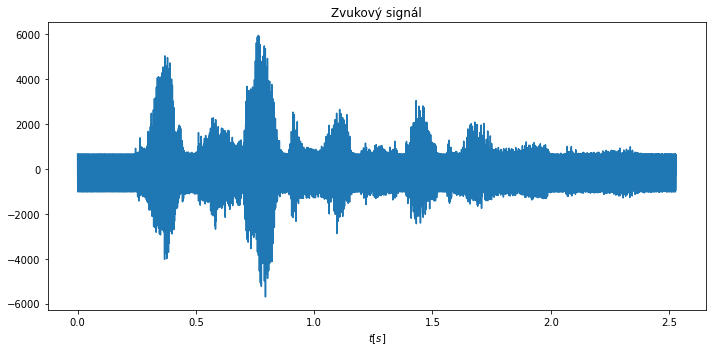

In [ ]:
fs, s = wavfile.read('xhorva14.wav')
#s, fs = sf.read('xhorva14.wav')
t = np.arange(s.size) / fs
cas = s.size/fs


print('TASK 1')
print('')
print('Cas:', cas, 's')
print('Frekvencia:', fs, 'Hz')
print('Pocet vzorkov: %d' % (cas*fs))

print("min =",min(s))
print("max =",max(s))


plt.figure(figsize=(10,5))
plt.plot(t, s)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')

plt.tight_layout()


TASK 2
52


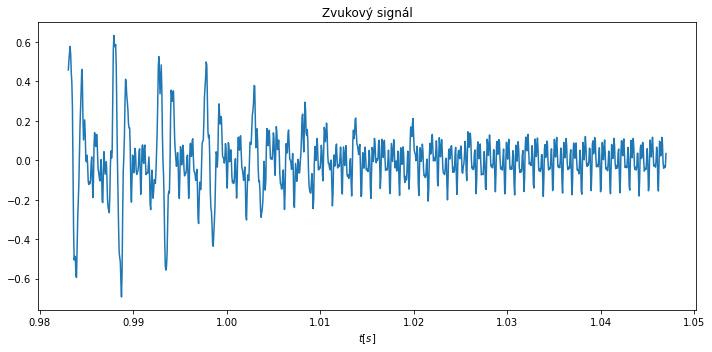

In [ ]:
print('TASK 2')


dataw = s + 0.0
dataw -= np.mean(dataw) #ustrednenie
dataw /= np.abs(s).max() #-1 az 1 range

t = np.arange(dataw.size) / fs

#plt.figure(figsize=(10,5))
#plt.plot(t, dataw)
#plt.gca().set_xlabel('$t[s]$')
#plt.gca().set_title('Ustredneny a normalizovany signál')
#plt.tight_layout()






frames = np.ndarray((math.ceil(cas*fs/512), 1024))
begin = 0
end = 1024
i = 0
while end < (cas*fs):
    frames[i] = s[begin:end]
    begin = begin + 512 + 256
    end = begin + 1024
    i += 1
print(i)


t = np.arange(frames[17].size)/fs
t = t + 1024/fs*768*20/1000
plt.figure(figsize=(10,5))
plt.plot(t, frames[17])
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')
plt.tight_layout()


In [ ]:
print('TASK 3')


dft = np.ndarray((1024), dtype=complex)
tmp = 0
for k in range(1024):
    for n in range(1024):
        tmp += frames[20][n]*np.exp(-1j*((2*math.pi)/1024) * k * n)
    dft[k] = tmp
    tmp = 0

for k in range(i):
    dft=np.fft.fft(frames[k])
print(np.allclose(dft,fft))


##fig,axs=plt.subplots(1)
##axs[0].
#plt.plot(t[0:512], dft[0:512])
##axs[1].plot(t[0:512], fft[0:512])
#plt.gca().set_xlabel('$f[Hz]$')
#plt.gca().set_title('Frame 20 - DFT')
#plt.savefig('input1.png')
#plt.show()

TASK 3
True


TASK 4


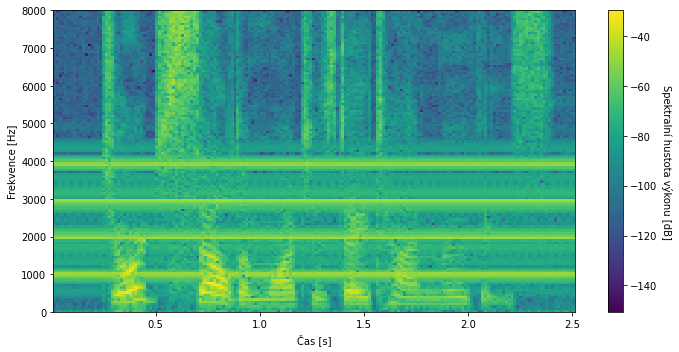

In [ ]:
print('TASK 4')

f, t, sgr = spectrogram(s, fs)
# prevod na PSD
# (ve spektrogramu se obcas objevuji nuly, ktere se nelibi logaritmu, proto +1e-20)
sgr_log = 10 * np.log10(sgr+1e-20) 
plt.figure(figsize=(10,5))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

from numpy import arange
plt.yticks(arange(8001, step=1000))

plt.tight_layout()

TASK 5/6


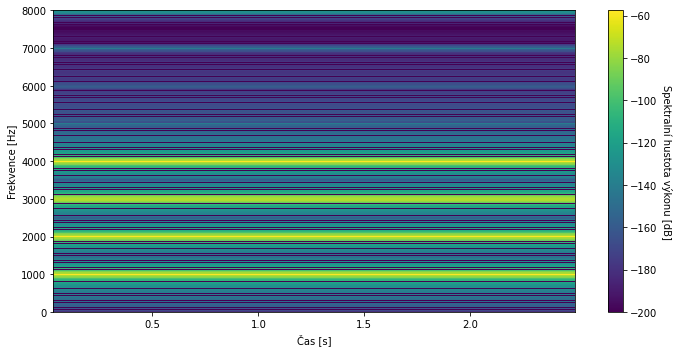

In [ ]:
print('TASK 5/6')

t2 = np.arange(cas * fs)
#amplitude = np.cos(f1 * 2*np.pi* t2) + np.cos(f2 * 2*np.pi* t2) + np.cos(f3 * 2*np.pi* t2) + np.cos(f4 * 2*np.pi* t2)

y1=np.cos(t2*1000*np.pi*2/fs)/128
y2=np.cos(t2*1000*2*np.pi*2/fs)/128
y3=np.cos(t2*1000*3*np.pi*2/fs)/128
y4=np.cos(t2*1000*4*np.pi*2/fs)/128
y=y1+y2+y3+y4

sf.write("4cos.wav", y,fs)

#IPython.display.display(IPython.display.Audio(amplitude, rate=fs))

scos, fscos = sf.read('4cos.wav')

tcos = np.arange(s.size) / fs


fcos, tcos, sgrcos = spectrogram(scos, fscos, nperseg=1024, noverlap= 512)
# prevod na PSD
# (ve spektrogramu se obcas objevuji nuly, ktere se nelibi logaritmu, proto +1e-20)
sgr_logcos = 10 * np.log10(sgrcos+1e-20)

plt.figure(figsize=(10,5))
plt.pcolormesh(tcos,fcos,sgr_logcos)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

from numpy import arange
plt.yticks(arange(8001, step=1000))
plt.tight_layout()

TASK 7
Koeficienty filtru 1 - A: [ 1.         -1.84342018  0.98731804] B: [ 0.99365902 -1.84342018  0.99365902]
Koeficienty filtru 2 - A: [ 1.         -1.42353799  0.97479488] B: [ 0.98739744 -1.42353799  0.98739744]
Koeficienty filtru 3 - A: [ 1.         -0.80405332  0.96242656] B: [ 0.98121328 -0.80405332  0.98121328]
Koeficienty filtru 4 - A: [ 1.         -0.07656486  0.95020924] B: [ 0.97510462 -0.07656486  0.97510462]
TASK 10


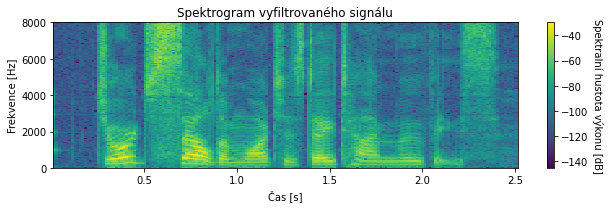

In [176]:
print('TASK 7')

xyz=975




##################
samp_freq = fs  # Sample frequency (Hz)
notch_freq = xyz  # Frequency to be removed from signal (Hz)
quality_factor = 30.0  # Quality factor
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
freq, h = signal.freqz(b_notch, a_notch, fs = samp_freq)
print('Koeficienty filtru 1 - A:', a_notch, 'B:', b_notch)
y_notched = signal.filtfilt(b_notch, a_notch, s)
###################################


N_imp = 32
imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls
h = signal.lfilter(b_notch, a_notch, imp)


plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()




z, p, k = signal.tf2zpk(b_notch, a_notch)

plt.figure(figsize=(4,3.5))
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))
# nuly, poly
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper left')
plt.tight_layout()

is_stable = (p.size == 0) or np.all(np.abs(p) < 1)

print('Filtr {} stabilní.'.format('je' if is_stable else 'není'))

w, H = signal.freqz(b_notch, a_notch)



_, ax = plt.subplots(1, 2, figsize=(9,3))
ax[0].plot(w / 2 / np.pi * fs, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')
ax[1].plot(w / 2 / np.pi * fs, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')
for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')
plt.tight_layout()


#################
notch_freq = xyz*2  # Frequency to be removed from signal (Hz)
quality_factor = 30.0  # Quality factor
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
freq, h = signal.freqz(b_notch, a_notch, fs = samp_freq)
print('Koeficienty filtru 2 - A:', a_notch, 'B:', b_notch)
y_notched = signal.filtfilt(b_notch, a_notch, y_notched)
####################

N_imp = 32
imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls
h = signal.lfilter(b_notch, a_notch, imp)


plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()




z, p, k = signal.tf2zpk(b_notch, a_notch)

plt.figure(figsize=(4,3.5))
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))
# nuly, poly
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper left')
plt.tight_layout()

is_stable = (p.size == 0) or np.all(np.abs(p) < 1)

print('Filtr {} stabilní.'.format('je' if is_stable else 'není'))

w, H = signal.freqz(b_notch, a_notch)



_, ax = plt.subplots(1, 2, figsize=(9,3))
ax[0].plot(w / 2 / np.pi * fs, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')
ax[1].plot(w / 2 / np.pi * fs, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')
for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')
plt.tight_layout()


##############################
notch_freq = xyz*3  # Frequency to be removed from signal (Hz)
quality_factor = 30.0  # Quality factor
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
freq, h = signal.freqz(b_notch, a_notch, fs = samp_freq)
print('Koeficienty filtru 3 - A:', a_notch, 'B:', b_notch)
y_notched = signal.filtfilt(b_notch, a_notch, y_notched)
#################################

N_imp = 32
imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls
h = signal.lfilter(b_notch, a_notch, imp)


plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()




z, p, k = signal.tf2zpk(b_notch, a_notch)

plt.figure(figsize=(4,3.5))
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))
 nuly, poly
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper left')
plt.tight_layout()

is_stable = (p.size == 0) or np.all(np.abs(p) < 1)

print('Filtr {} stabilní.'.format('je' if is_stable else 'není'))

w, H = signal.freqz(b_notch, a_notch)



_, ax = plt.subplots(1, 2, figsize=(9,3))
ax[0].plot(w / 2 / np.pi * fs, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')
ax[1].plot(w / 2 / np.pi * fs, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')
for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

######################################
notch_freq = xyz*4  # Frequency to be removed from signal (Hz)
quality_factor = 30.0  # Quality factor
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
freq, h = signal.freqz(b_notch, a_notch, fs = samp_freq)
print('Koeficienty filtru 4 - A:', a_notch, 'B:', b_notch)
y_notched = signal.filtfilt(b_notch, a_notch, y_notched)
#######################################

N_imp = 32
imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls
h = signal.lfilter(b_notch, a_notch, imp)
plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
z, p, k = signal.tf2zpk(b_notch, a_notch)

plt.figure(figsize=(4,3.5))
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))
 nuly, poly
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper left')
plt.tight_layout()

is_stable = (p.size == 0) or np.all(np.abs(p) < 1)

print('Filtr {} stabilní.'.format('je' if is_stable else 'není'))

w, H = signal.freqz(b_notch, a_notch)



_, ax = plt.subplots(1, 2, figsize=(9,3))
ax[0].plot(w / 2 / np.pi * fs, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')
ax[1].plot(w / 2 / np.pi * fs, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')
for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


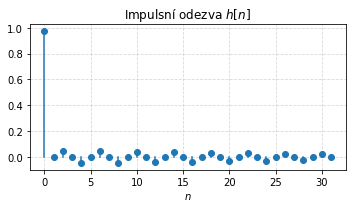

In [ ]:
N_imp = 32
imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls
h = signal.lfilter(b_notch, a_notch, imp)


plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

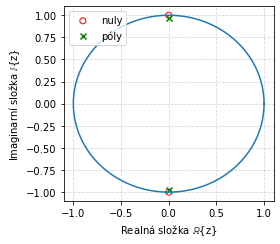

In [ ]:
z, p, k = signal.tf2zpk(b_notch, a_notch)

plt.figure(figsize=(4,3.5))
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))
# nuly, poly
plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper left')
plt.tight_layout()

In [ ]:
is_stable = (p.size == 0) or np.all(np.abs(p) < 1)

print('Filtr {} stabilní.'.format('je' if is_stable else 'není'))

Filtr je stabilní.


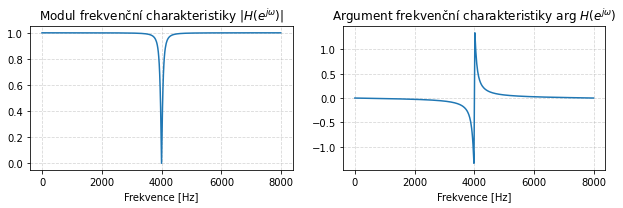

In [ ]:
w, H = signal.freqz(b_notch, a_notch)



_, ax = plt.subplots(1, 2, figsize=(9,3))
ax[0].plot(w / 2 / np.pi * fs, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')
ax[1].plot(w / 2 / np.pi * fs, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')
for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

TASK 10


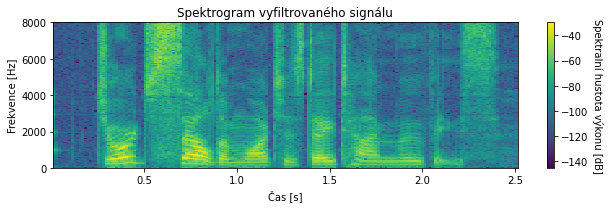

In [180]:
print('TASK 10')



f, t, sfgr = signal.spectrogram(y_notched, fs)
sfgr_log = 10 * np.log10(sfgr+1e-20)
plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sfgr_log)
plt.gca().set_title('Spektrogram vyfiltrovaného signálu')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
plt.tight_layout()

sf.write('clean_bandstop.wav', y_notched, fs)



In [181]:
IPython.display.display(IPython.display.Audio(y_notched, rate=fs))